# Module: Applied Artificial Intelligence
## Handwritten Digit Recognition Model
### Student ID: 201910321

#### Importing Required Libraries

In [1]:
import numpy as np
import tensorflow as tf
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import mnist
from keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Flatten, Dense, Dropout
from keras.optimizers import SGD
from sklearn.metrics import classification_report, confusion_matrix
import cv2
import os

### Loading in the dataset and getting it ready for training.

In [2]:
"""Loading in the MNIST dataset. The load_data function returns two tuples of numpy arrays with the training set containing 60,000 images and labels and the test
   set containing 10,000 labels and images."""
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
'''This set of code normalizes the pixel values of the dataset images to be between 0 and 1, by dividing them by 255, which is the maximum pixel value for 
   a grayscale image.'''
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [4]:
'''This set of code reshapes the input data by adding a channel dimension with the size of 1 for the CNN.
   This is done because CNNs require input data with a 3D shape.'''
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
# Printing the shapes of the dataset to ensure changes have been made properly.
print('Training dataset shape:', x_train.shape)
print('Training label shape:', y_train.shape)
print('Testing dataset shape:', x_test.shape)
print('Testing label shape:', y_test.shape)

Training dataset shape: (60000, 28, 28, 1)
Training label shape: (60000,)
Testing dataset shape: (10000, 28, 28, 1)
Testing label shape: (10000,)


In [5]:
'''This set of code converts the labels in the dataset to a categorical format using the to_categorical() function. 
   This converts all the labels into one-hot encoded vectors with a length of 10. The MNIST dataset contains integer labels from 0 to 9 which represent the digit in each image,
   but to train a neural network to recognize the digits, it needs to predict the probability that each image belongs ot each of the 10 possible classes (digits 0 to 9).
'''
# Convert the labels to categorical format
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

### Training the model

In [6]:
''' Creating a data augmentation layer to help the model work with a variety of data and improve its ability to generalize to new unseen data. '''
# Creating a data augmentation layer
data_augmentation = tf.keras.Sequential([
    # This layer randomly rotates the input image in a range of [-0.1, 0.1]. The input_shape parameter indicates the size of the input image. 
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.1, input_shape=(28, 28, 1)),
    # This layer randomly translates the input image along the horizontal and vertical axes by the same range.
    tf.keras.layers.experimental.preprocessing.RandomTranslation(0.1, 0.1),
    #This layer randomly zooms the input image by the same range. 
    tf.keras.layers.experimental.preprocessing.RandomZoom(0.1),
    tf.keras.layers.experimental.preprocessing.RandomContrast(factor=0.1),
    tf.keras.layers.experimental.preprocessing.Resizing(28, 28),
])


In [7]:
''' This modified version of the LeNet-5 architecture includes a data augmentation layer, additional batch and normalization layers and a dropout layer to improve the performance of the model'''
# Modified LeNet-5 architecture
model = tf.keras.models.Sequential([
    # Data augmentation layer
    data_augmentation,
    # Convolutional layer with 32 filters, 3x3 kernel, ReLU activation, and same padding.
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)),
    # Batch normalization layer
    tf.keras.layers.BatchNormalization(),
    # Convolutional layer with 32 filters, 3x3 kernel, ReLU activation, and same padding.
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    # Batch normalization layer
    tf.keras.layers.BatchNormalization(),
    # Max pooling layer with 2x2 pool size and stride 2.
    tf.keras.layers.MaxPooling2D((2, 2), strides=(2, 2)),
    # Convolutional layer with 64 filters, 3x3 kernel, ReLU activation, and same padding.
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    # Batch normalization layer
    tf.keras.layers.BatchNormalization(),
    # Convolutional layer with 64 filters, 3x3 kernel, ReLU activation, and same padding.
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    # Batch normalization layer
    tf.keras.layers.BatchNormalization(),
    # Max pooling layer with 2x2 pool size and stride 2.
    tf.keras.layers.MaxPooling2D((2, 2), strides=(2, 2)),
    # Flatten layer.
    tf.keras.layers.Flatten(),
    # Fully connected layer with 512 units and ReLU activation.
    tf.keras.layers.Dense(512, activation='relu'),
    # Batch normalization layer
    tf.keras.layers.BatchNormalization(),
    # Dropout layer with rate 0.5.
    tf.keras.layers.Dropout(0.5),
    # Output layer with 10 units and softmax activation.
    tf.keras.layers.Dense(10, activation='softmax')
])


### SGD optimizer

In [8]:
# Creating an SGD optimizer with custom parameters
#''' The learning rate controls how much the models weights are updated during training nad the momentum helps to accelerate convergence and to avoid local minima.'''
#sgd = SGD(learning_rate=0.01, momentum=0.9)

# Compiling the model
#model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

###  ADAM optimizer

In [9]:
# Compiling the model
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [10]:
# Training the model
history = model.fit(x_train, y_train, batch_size = 120, epochs = 18, validation_data = (x_test, y_test))

Epoch 1/18
500/500 [==============================] - 99s 189ms/step - loss: 0.2742 - accuracy: 0.9169 - val_loss: 0.4037 - val_accuracy: 0.8636
Epoch 2/18
500/500 [==============================] - 94s 188ms/step - loss: 0.1070 - accuracy: 0.9666 - val_loss: 0.0736 - val_accuracy: 0.9776
Epoch 3/18
500/500 [==============================] - 92s 184ms/step - loss: 0.0869 - accuracy: 0.9733 - val_loss: 0.0631 - val_accuracy: 0.9804
Epoch 4/18
500/500 [==============================] - 93s 186ms/step - loss: 0.0730 - accuracy: 0.9773 - val_loss: 0.0455 - val_accuracy: 0.9855
Epoch 5/18
500/500 [==============================] - 94s 187ms/step - loss: 0.0666 - accuracy: 0.9794 - val_loss: 0.0290 - val_accuracy: 0.9901
Epoch 6/18
500/500 [==============================] - 95s 190ms/step - loss: 0.0608 - accuracy: 0.9813 - val_loss: 0.0686 - val_accuracy: 0.9816
Epoch 7/18
500/500 [==============================] - 92s 183ms/step - loss: 0.0579 - accuracy: 0.9818 - val_loss: 0.0381 - val_ac

### Checking model accuracy

In [11]:
'''Generating predictions and evaluating the models performance using a classification report and confusion matrix.'''
# Generating predictions 
y_pred = model.predict(x_test)

313/313 [==============================] - 4s 12ms/step


In [12]:
'''The if statement checks whether or not the test labels are one-hot encoded. If true, the hone-hot encoded labels are converted to integer 
labels with the use of np.argmax. If false, the probability scores are converted to integer labels using np.round and casting the result to integers.'''

if len(y_test.shape) > 1 and y_test.shape[-1] > 1:
    # Converting one-hot encoded labels to integer labels
    y_test = np.argmax(y_test, axis=1)
    y_pred = np.argmax(y_pred, axis=1)
else:
    # Converting probability scores to integer labels
    y_pred = np.round(y_pred).astype(int)

In [13]:
# Creating confusion matrix
matrix = confusion_matrix(y_test, y_pred)

In [14]:
# Printing classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       980
           1       1.00      0.97      0.98      1135
           2       0.98      1.00      0.99      1032
           3       0.99      1.00      0.99      1010
           4       1.00      0.98      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      1.00      0.99       958
           7       0.99      0.98      0.99      1028
           8       0.98      1.00      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



<AxesSubplot:>

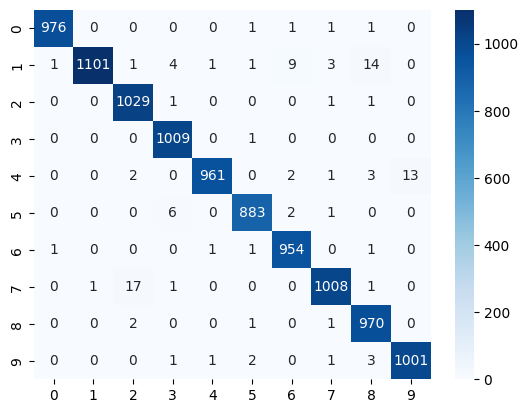

In [15]:
# Plotting confusion matrix as heatmap
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues')

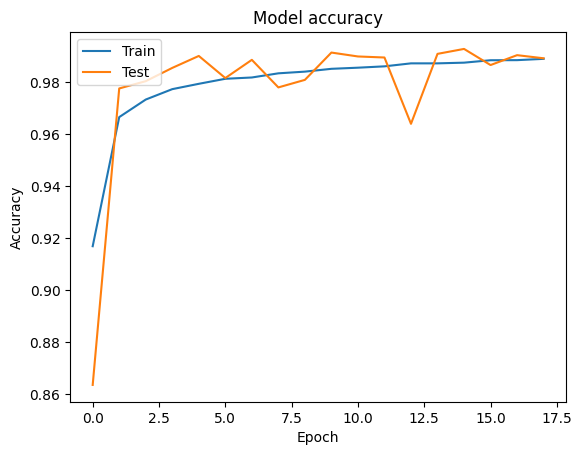

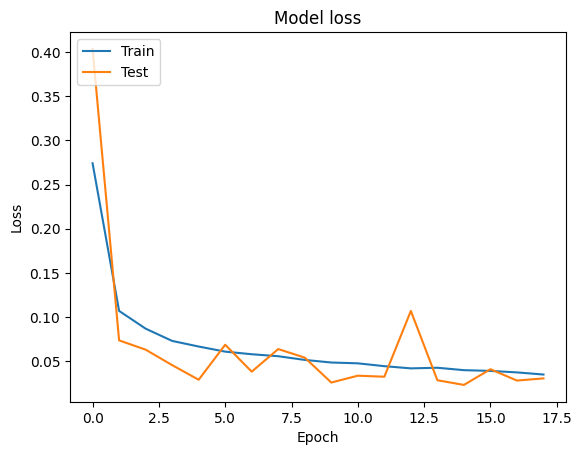

In [17]:
def plot_history(history):
    # Plot training & validation accuracy values
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

plot_history(history)


### Predictions 

#### Own Dataset Predictions

In [28]:
# Set the folder path. 
Own_data = './Dataset/Own Dataset/'

Processing images in folder: 0
1/1 [==============================] - 0s 21ms/step


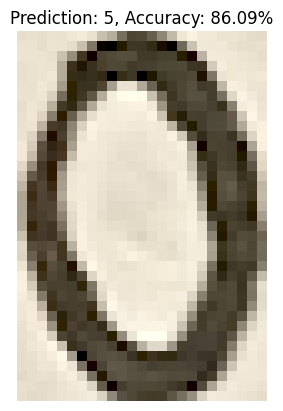

1/1 [==============================] - 0s 18ms/step


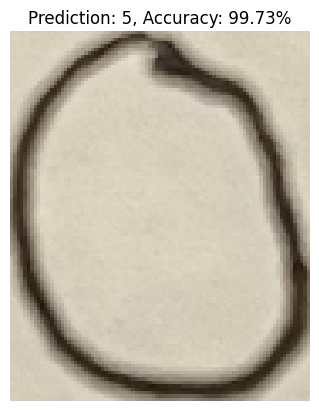

Predictions in folder 0: [5, 5]
Processing images in folder: 1
1/1 [==============================] - 0s 19ms/step


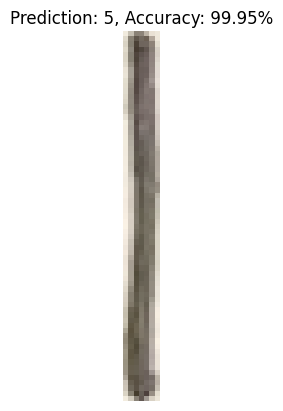

1/1 [==============================] - 0s 30ms/step


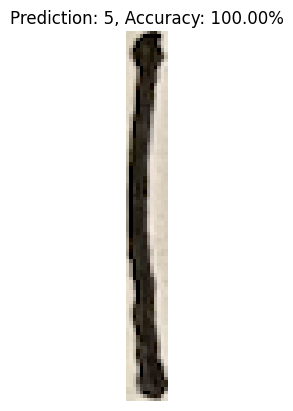

1/1 [==============================] - 0s 19ms/step


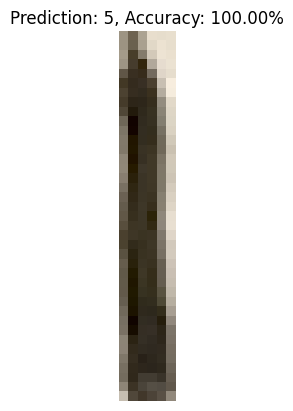

1/1 [==============================] - 0s 20ms/step


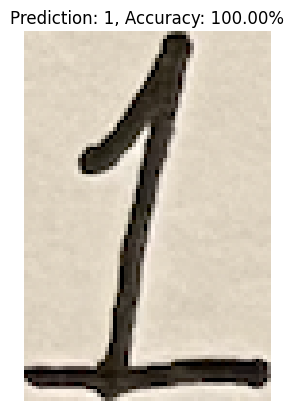

Predictions in folder 1: [5, 5, 5, 1]
Processing images in folder: 2
1/1 [==============================] - 0s 18ms/step


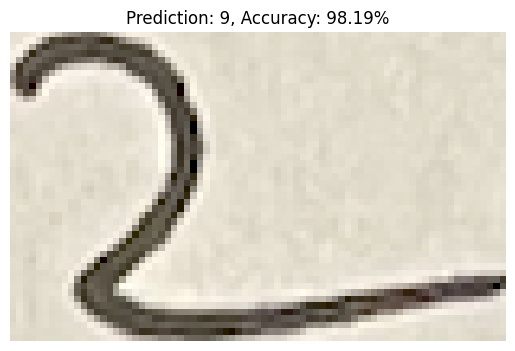

1/1 [==============================] - 0s 17ms/step


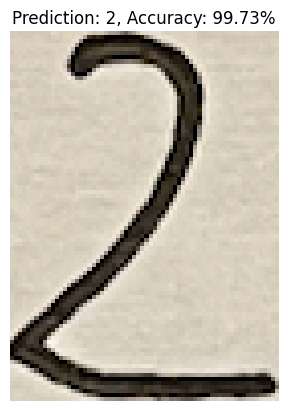

1/1 [==============================] - 0s 19ms/step


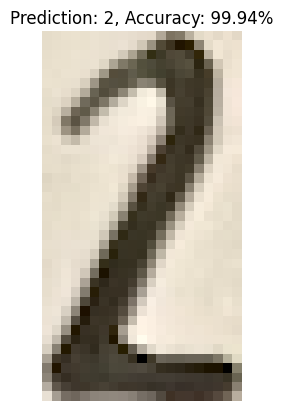

1/1 [==============================] - 0s 18ms/step


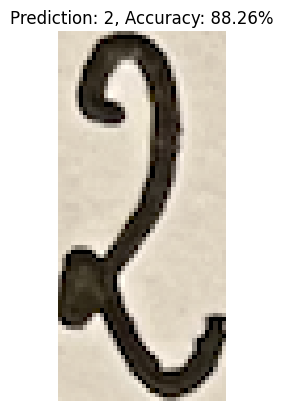

Predictions in folder 2: [9, 2, 2, 2]
Processing images in folder: 3
1/1 [==============================] - 0s 20ms/step


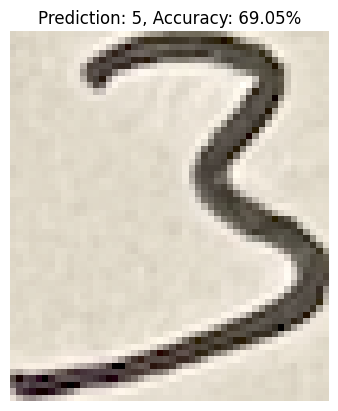

1/1 [==============================] - 0s 18ms/step


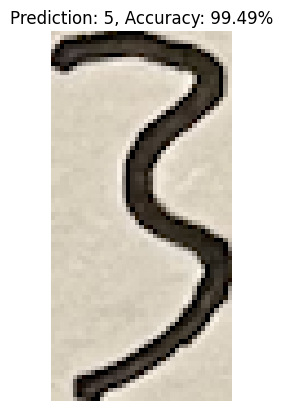

1/1 [==============================] - 0s 18ms/step


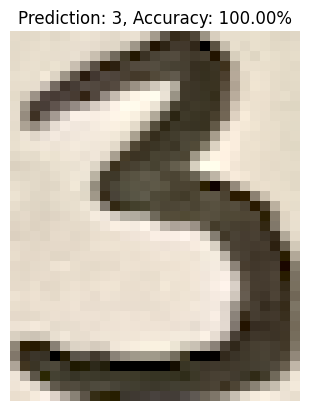

1/1 [==============================] - 0s 22ms/step


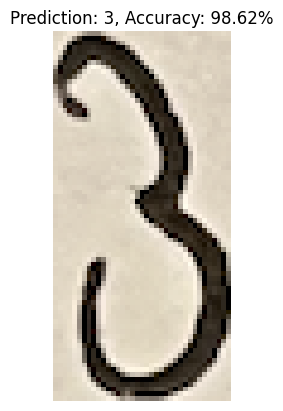

Predictions in folder 3: [5, 5, 3, 3]
Processing images in folder: 4
1/1 [==============================] - 0s 19ms/step


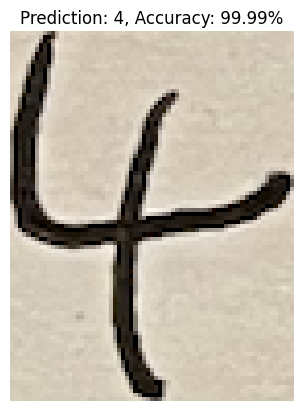

1/1 [==============================] - 0s 20ms/step


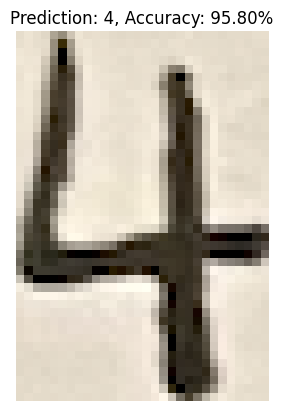

1/1 [==============================] - 0s 18ms/step


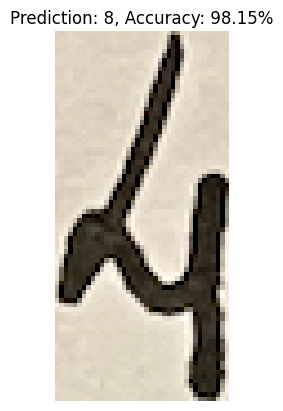

Predictions in folder 4: [4, 4, 8]
Processing images in folder: 5
1/1 [==============================] - 0s 27ms/step


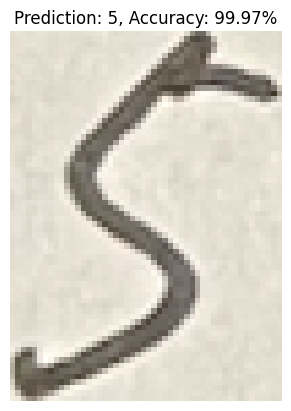

1/1 [==============================] - 0s 19ms/step


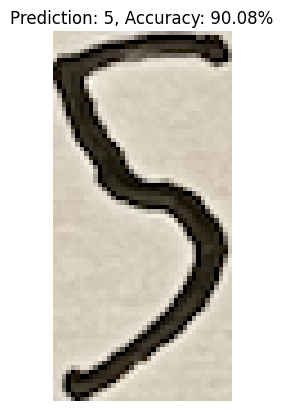

1/1 [==============================] - 0s 18ms/step


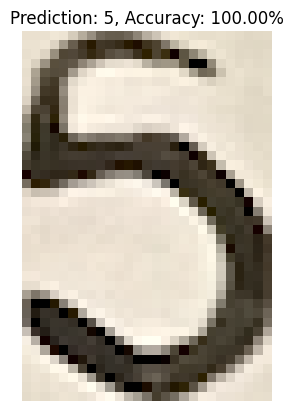

1/1 [==============================] - 0s 18ms/step


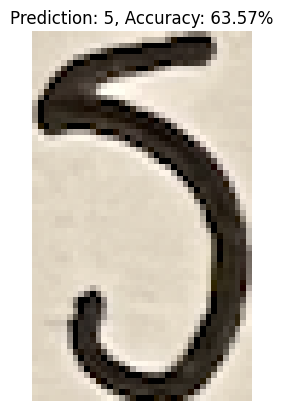

Predictions in folder 5: [5, 5, 5, 5]
Processing images in folder: 6
1/1 [==============================] - 0s 19ms/step


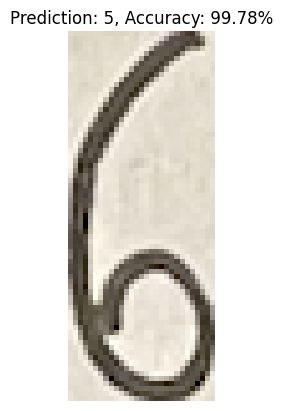

1/1 [==============================] - 0s 18ms/step


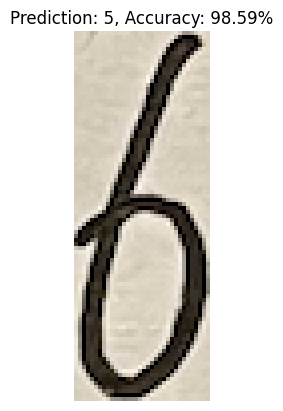

1/1 [==============================] - 0s 19ms/step


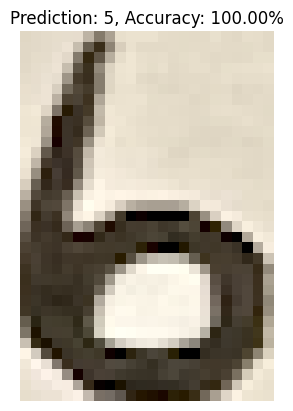

1/1 [==============================] - 0s 19ms/step


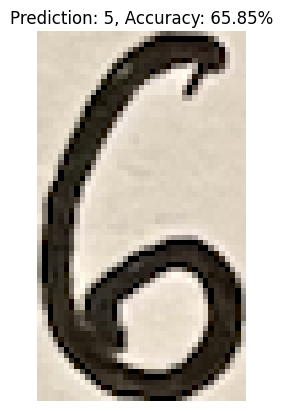

Predictions in folder 6: [5, 5, 5, 5]
Processing images in folder: 7
1/1 [==============================] - 0s 21ms/step


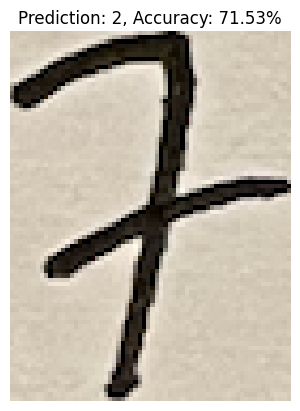

1/1 [==============================] - 0s 18ms/step


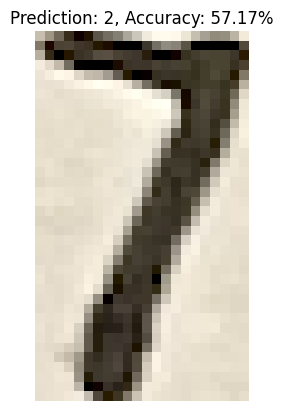

1/1 [==============================] - 0s 18ms/step


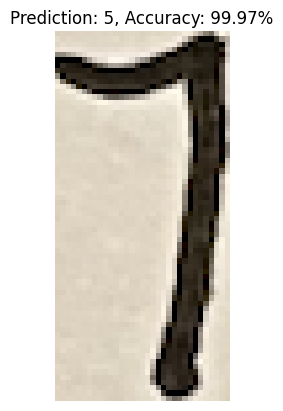

Predictions in folder 7: [2, 2, 5]
Processing images in folder: 8
1/1 [==============================] - 0s 19ms/step


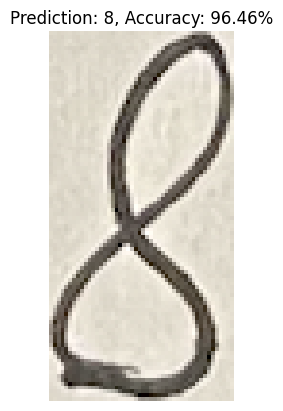

1/1 [==============================] - 0s 20ms/step


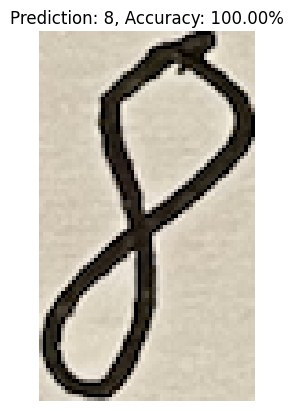

1/1 [==============================] - 0s 20ms/step


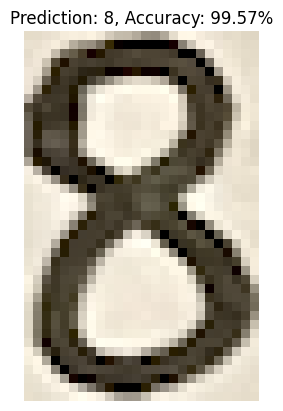

1/1 [==============================] - 0s 18ms/step


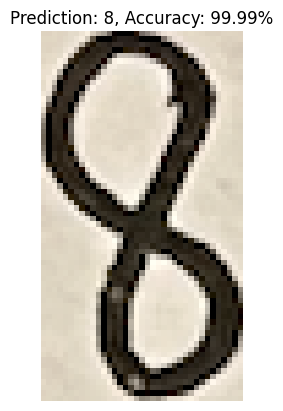

Predictions in folder 8: [8, 8, 8, 8]
Processing images in folder: 9
1/1 [==============================] - 0s 17ms/step


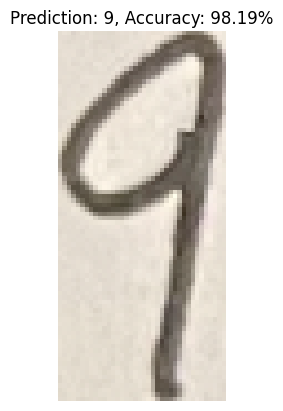

1/1 [==============================] - 0s 19ms/step


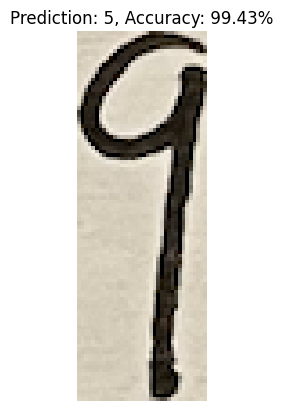

1/1 [==============================] - 0s 17ms/step


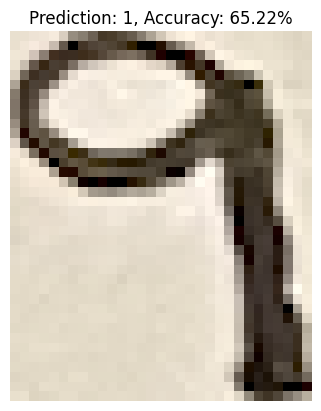

1/1 [==============================] - 0s 19ms/step


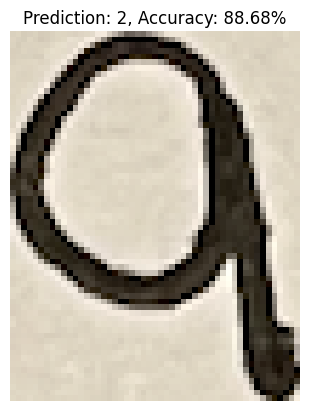

Predictions in folder 9: [9, 5, 1, 2]


In [29]:
''' This set of code iterates over every image in the folder, processes the images, predicts the digits in the images using the trained model
and visualizes the images along with the predicted digit.'''
# Iterating through each folder in the main folder. 
for folder_name in os.listdir(Own_data):
   # Joining the folder path and the folder name to create one full path. 
    folder_path = os.path.join(Own_data, folder_name)
# Checking if the path is a directory. 
    if os.path.isdir(folder_path):
        print(f'Processing images in folder: {folder_name}')

        # Creating a list to store the predicted digits for all images. 
        digits = []
        # Iterating through each image in the folder. 
        for filename in os.listdir(folder_path):
            # Creating teh full image path py joining the folder path and the image file name. 
            img_path = os.path.join(folder_path, filename)
            # Reading in the image. 
            img = cv2.imread(img_path)
            # Converting the image to grey scale. 
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

            # Applying Gaussian blur to the grey scaled image to reduce noise and to also help smooth the image. 
            blurred = cv2.GaussianBlur(gray, (5, 5), 0)
            # Applying adaptive thresholding to the blurred image converting in to a binary image. 
            thresh = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)

            # Applying erosion and dilation to the thresholded image to help remove noise and improve the digit boundary.
            kernel = np.ones((3, 3), np.uint8)
            thresh = cv2.erode(thresh, kernel, iterations=1)
            thresh = cv2.dilate(thresh, kernel, iterations=1)
            # Locating contours in the processed image.
            contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
            # Filtering the contours.
            min_area = 100
            contours = [c for c in contours if cv2.contourArea(c) > min_area]
            # Sorting the contours from left to right (based on x coordinate). 
            contours = sorted(contours, key=lambda c: cv2.boundingRect(c)[0])
            # Iterating through each contour. 
            for contour in contours:
                # Applying a bounding rectangle to the contour. 
                (x, y, w, h) = cv2.boundingRect(contour)
                # Extracting the digit from the threshold image using the bounding rectangle coordinate. 
                digit = thresh[y:y+h, x:x+w]
                # Resizing hte image to match the input size. 
                digit = cv2.resize(digit, (28, 28))
                # Reshaping the image to match the input size. 
                digit = digit.reshape(1, 28, 28, 1)
                # Normalizing the pixels. 
                digit = digit / 255.0
                # Using the trained model to make predictions. 
                prob = model.predict(digit)
                # Getting the digit with the highest probability. 
                prediction = np.argmax(prob)
                # Getting the accuracy of the prediction. 
                accuracy = prob[0][prediction] * 100
                # adding the predicted images to the list. 
                digits.append(prediction)

                # Display the image, prediction, and accuracy
                plt.imshow(cv2.cvtColor(img[y:y+h, x:x+w], cv2.COLOR_BGR2RGB))
                plt.title(f"Prediction: {prediction}, Accuracy: {accuracy:.2f}%")
                plt.axis('off')
                plt.show()

        print(f'Predictions in folder {folder_name}:', digits)


#### MNIST dataset Predictions

In [20]:
# Loading in the MNIST dataset.
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [21]:
# Normalizing the dataset.
x_test = x_test / 255.0

In [30]:
# Setting the number of predictions to display.
num_predictions = 20

1/1 [==============================] - 0s 21ms/step


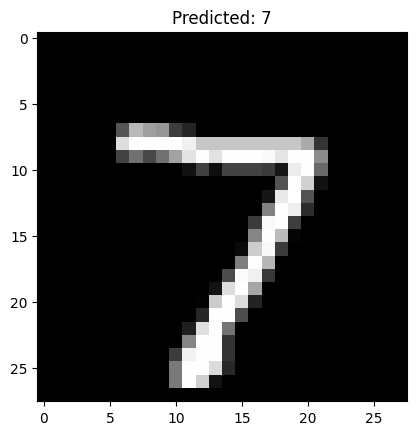

1/1 [==============================] - 0s 19ms/step


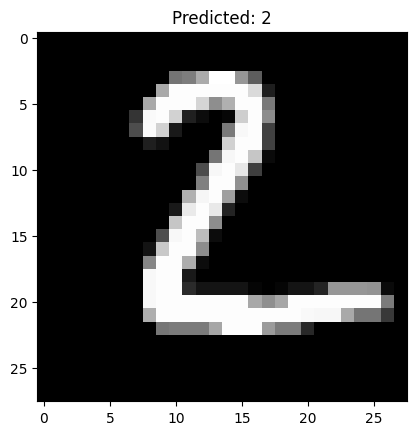

1/1 [==============================] - 0s 18ms/step


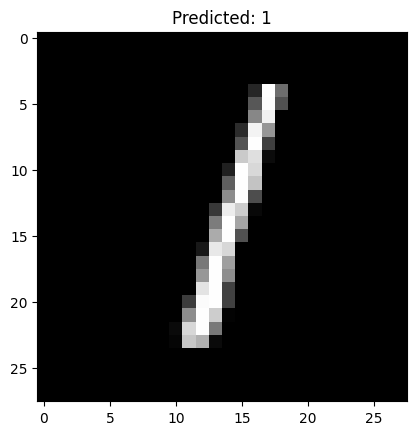

1/1 [==============================] - 0s 22ms/step


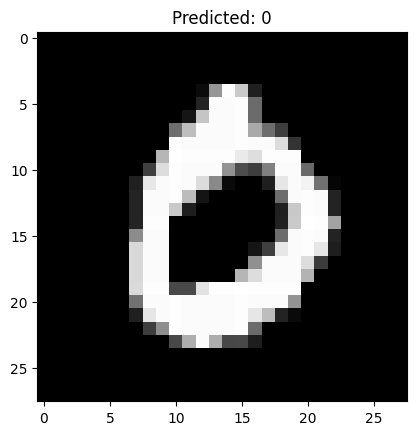

1/1 [==============================] - 0s 19ms/step


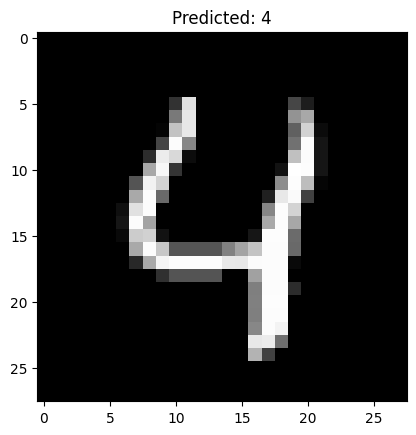

1/1 [==============================] - 0s 17ms/step


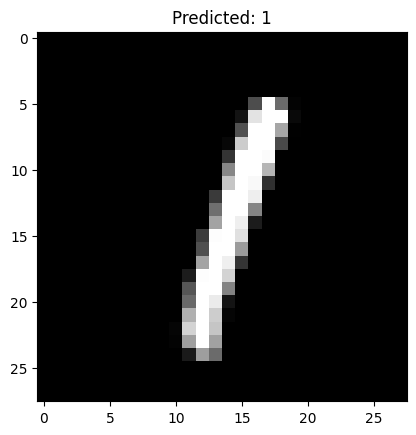

1/1 [==============================] - 0s 17ms/step


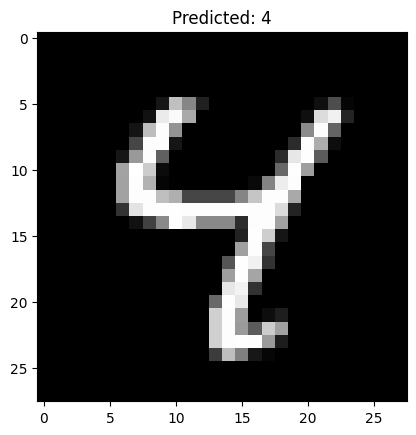

1/1 [==============================] - 0s 19ms/step


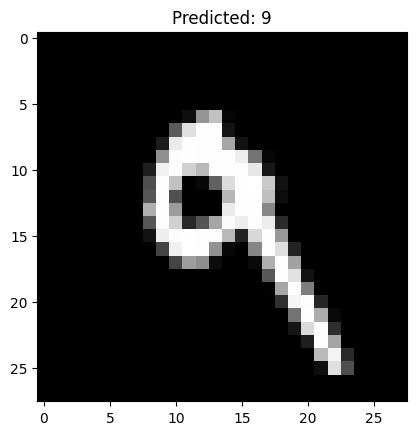

1/1 [==============================] - 0s 18ms/step


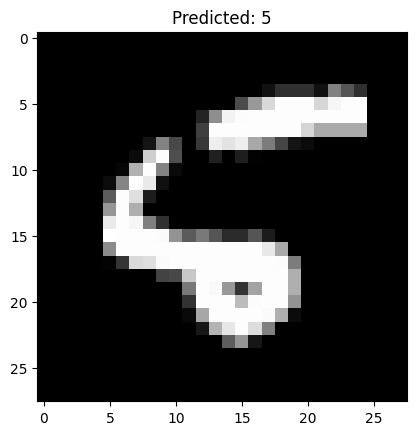

1/1 [==============================] - 0s 25ms/step


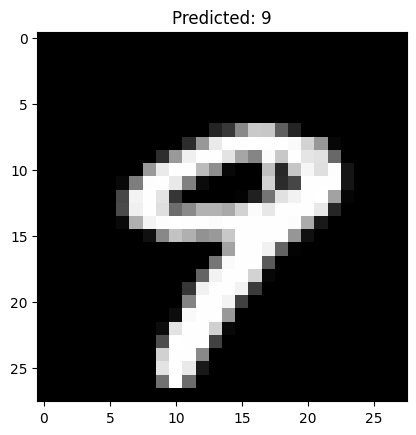

1/1 [==============================] - 0s 18ms/step


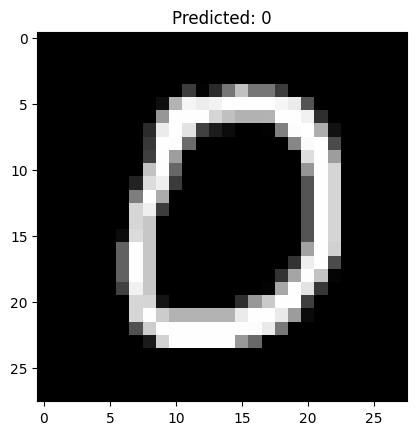

1/1 [==============================] - 0s 18ms/step


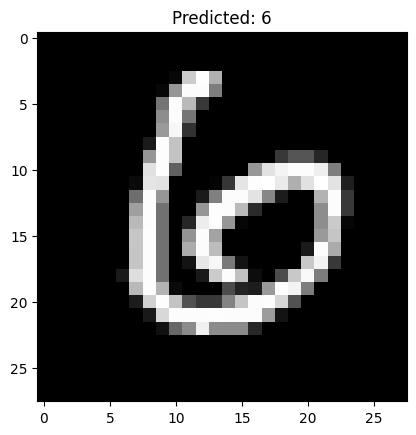

1/1 [==============================] - 0s 22ms/step


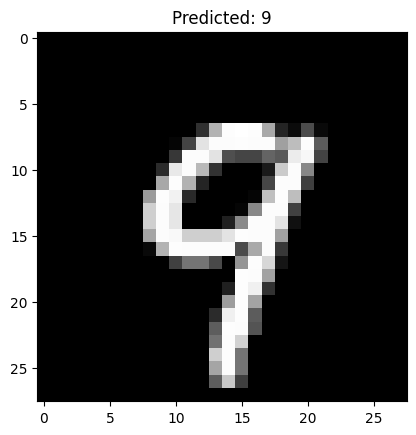

1/1 [==============================] - 0s 19ms/step


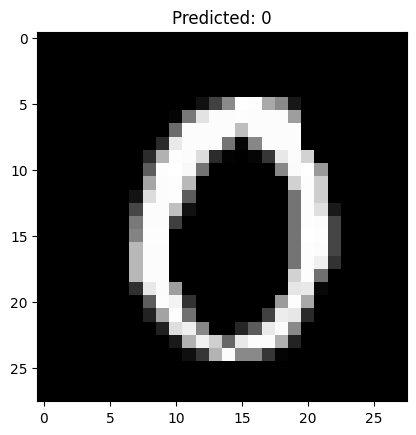

1/1 [==============================] - 0s 19ms/step


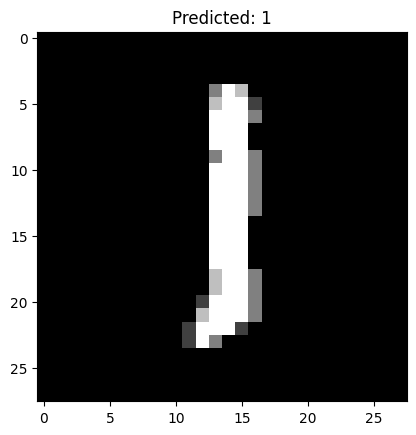

1/1 [==============================] - 0s 20ms/step


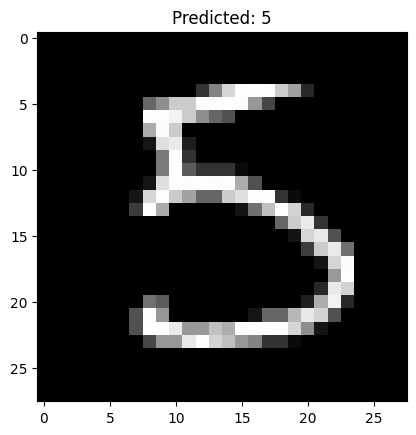

1/1 [==============================] - 0s 18ms/step


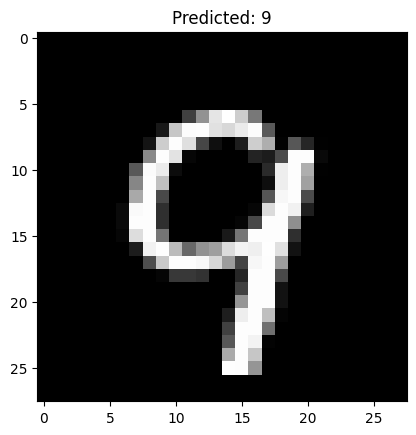

1/1 [==============================] - 0s 17ms/step


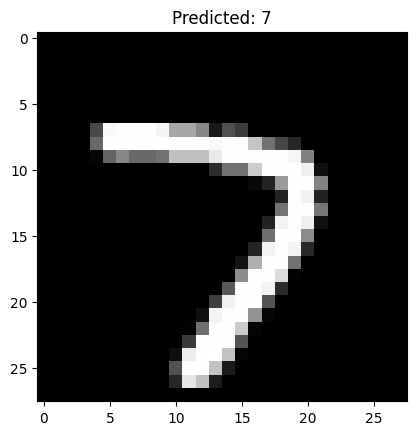

1/1 [==============================] - 0s 20ms/step


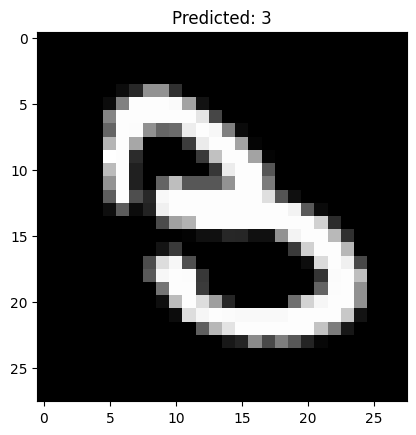

1/1 [==============================] - 0s 19ms/step


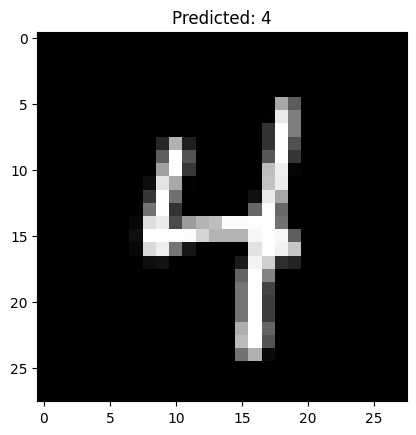

In [31]:
# Iterating over the images in the test set.
for i in range(num_predictions):
    img = x_test[i]
    img_resized = np.expand_dims(img, axis=0).reshape(1, 28, 28, 1)

    # Predicting the digit.
    prob = model.predict(img_resized)
    prediction = np.argmax(prob)

    # Displaying the image and its prediction result.
    plt.imshow(img, cmap='gray')
    plt.title(f"Predicted: {prediction}")
    plt.show()


#### CENPARMI Dataset Predictions

In [49]:
# Set the folder path from 0 - 9. 
folder_path = "./Dataset/CENPARMI/9"

1/1 [==============================] - 0s 19ms/step


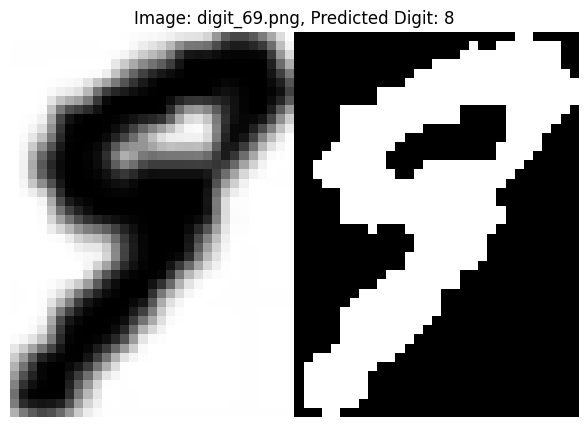

1/1 [==============================] - 0s 21ms/step


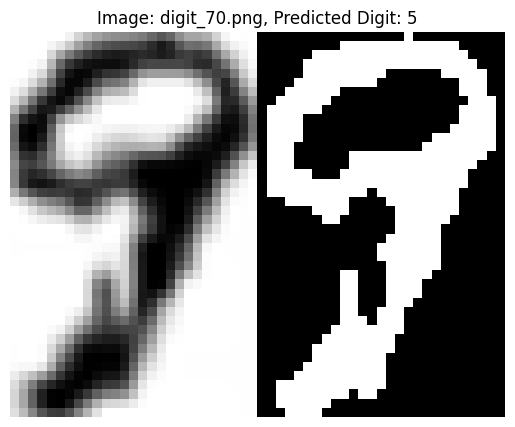

1/1 [==============================] - 0s 18ms/step


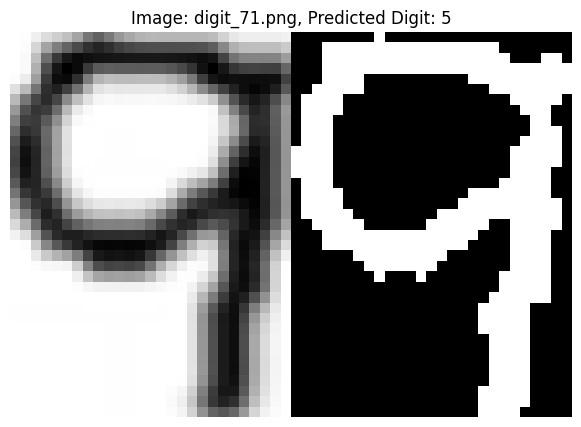

1/1 [==============================] - 0s 19ms/step


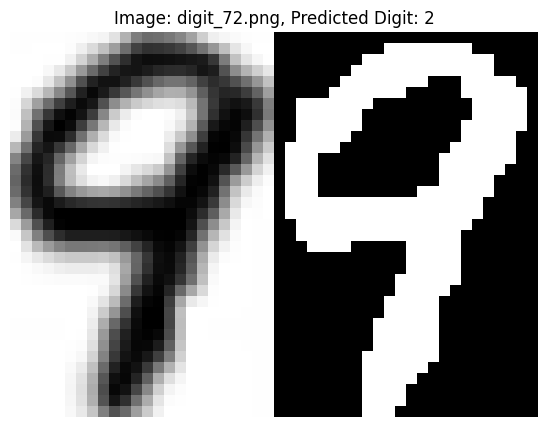

1/1 [==============================] - 0s 19ms/step


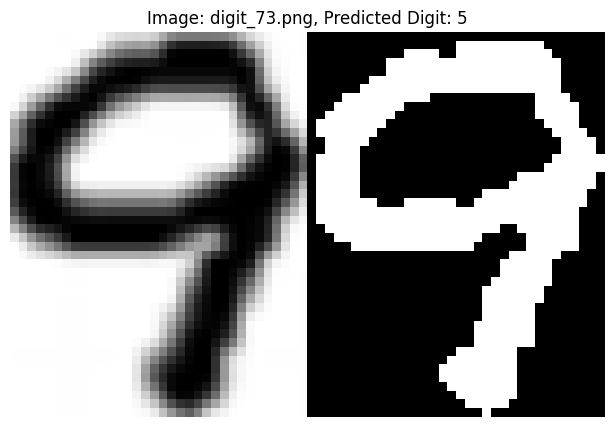

1/1 [==============================] - 0s 19ms/step


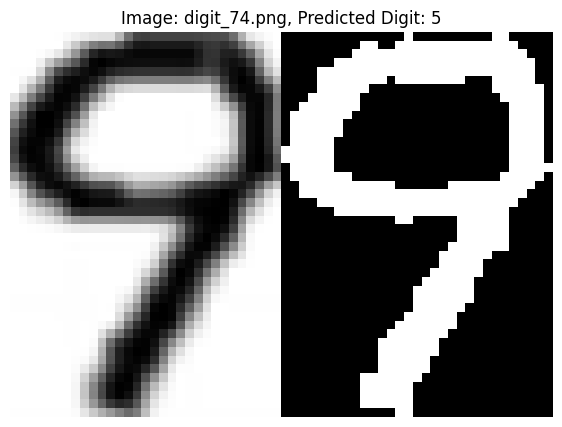

1/1 [==============================] - 0s 19ms/step


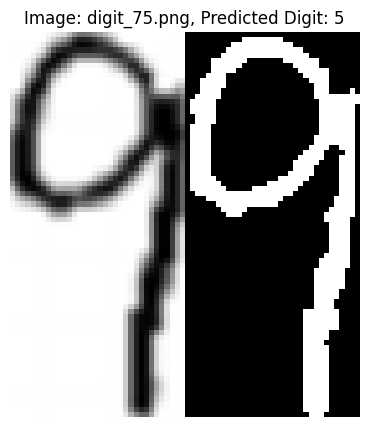

1/1 [==============================] - 0s 19ms/step


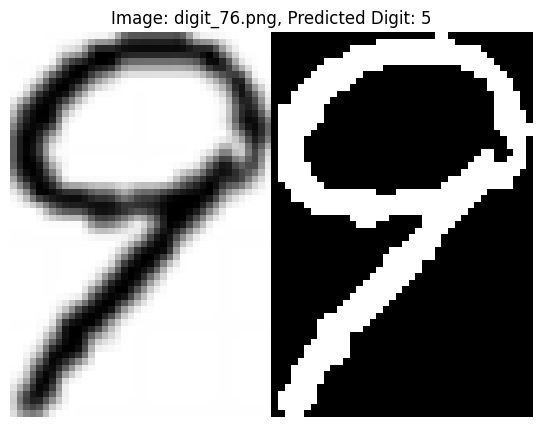

[8, 5, 5, 2, 5, 5, 5, 5]


In [50]:
''' This set of code iterates over every image in the folder, processes the images, predicts the digits in the images using the trained model
and visualizes the images along with the predicted digit.'''
# Creating a list to store the predicted digits for all images. 
digits = []
# The outer loop iterates through all the images in the folder.
for filename in os.listdir(folder_path):
    # Joining the folder path and file mane to create a full image path.
    img_path = os.path.join(folder_path, filename)
    # Reading the image from the path.
    img = cv2.imread(img_path)  
    # Converting the image from the BGR color space to grey scale.
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Applying adaptive thresholding to the grey scale image using Gaussian thresholding with block size of 11 and constant of 2. 
    # This makes the output image binary with he digits as white pixels and the background as black pixels.
    thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)
    # Finding contours in the binary image, retrieving only extreme outer contours and compressing the segments to leave the end points for contour approximation.
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    # Defining a min area for filtering contours.
    min_area = 100
    # Filtering out contours with less area than the min area threshold. 
    contours = [c for c in contours if cv2.contourArea(c) > min_area]
    # Sorting the contours by their x coordinate. 
    contours = sorted(contours, key=lambda c: cv2.boundingRect(c)[0])
    #The nested for loop iterates over each contour found in the thresholded image.
    for contour in contours:
        # Calculating the bounding rectangle of the contour and storing the x,y, width and height in the variables. 
        (x, y, w, h) = cv2.boundingRect(contour)
        # Extracting the digit region from the thresholded image using bounding rectangle coordinates. 
        digit = thresh[y:y+h, x:x+w]
        # Resizing the extracted digit region to 28 x 28 pixles. 
        digit = cv2.resize(digit, (28, 28))
        # Reshaping the digit image to fit the model input shape and normalizing the pixel value range by dividing by 255.0.
        digit = digit.reshape(1, 28, 28, 1)
        digit = digit / 255.0
        # Predicting the digit using hte trained model and gets the digit with the highest probability. 
        prob = model.predict(digit)
        prediction = np.argmax(prob)
        # Appends the predicted digits to the list. 
        digits.append(prediction)

        # Combining the original image and the thresholded image
        combined = cv2.hconcat([img, cv2.cvtColor(thresh, cv2.COLOR_GRAY2BGR)])

        # Showing the combined image and the predicted digit using matplotlib
        plt.figure(figsize=(10, 5))
        plt.imshow(cv2.cvtColor(combined, cv2.COLOR_BGR2RGB))
        plt.title(f'Image: {filename}, Predicted Digit: {prediction}')
        plt.axis('off')
        plt.show()

print(digits)


#### CEDAR Dataset Predictions

In [69]:
# Set the folder path from 0 - 9. 
folder_path = "Dataset/CEDAR/0"

1/1 [==============================] - 0s 18ms/step


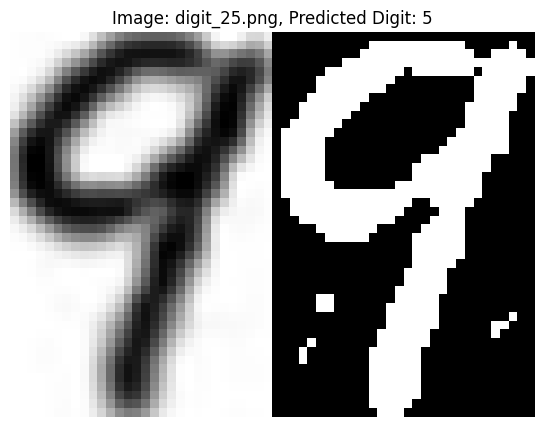

1/1 [==============================] - 0s 19ms/step


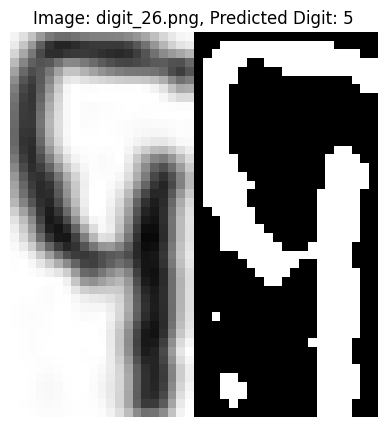

1/1 [==============================] - 0s 24ms/step


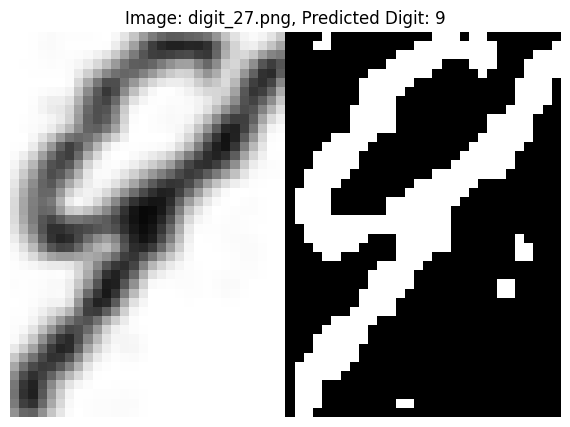

1/1 [==============================] - 0s 20ms/step


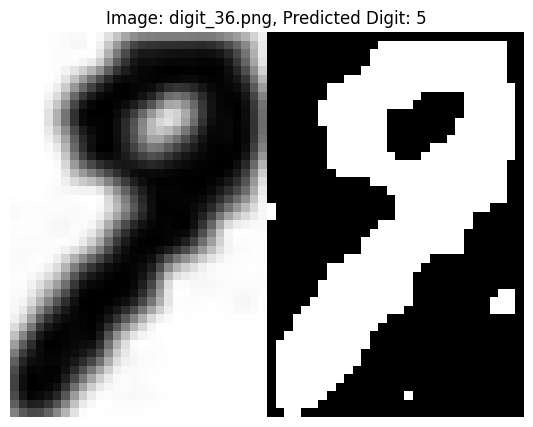

1/1 [==============================] - 0s 19ms/step


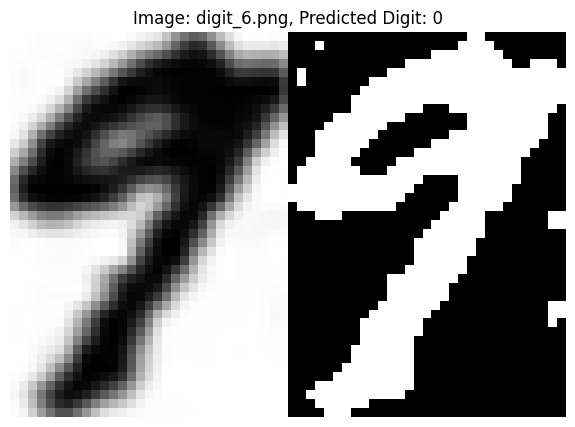

1/1 [==============================] - 0s 17ms/step


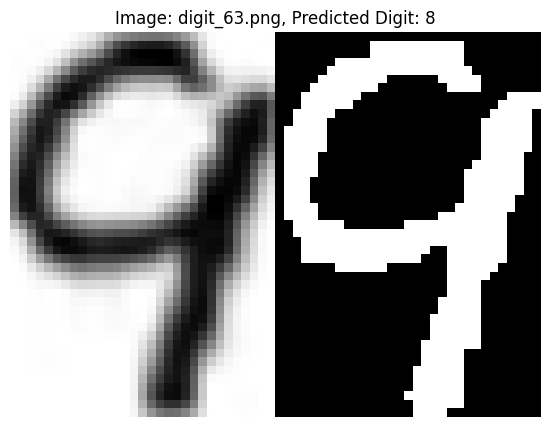

1/1 [==============================] - 0s 18ms/step


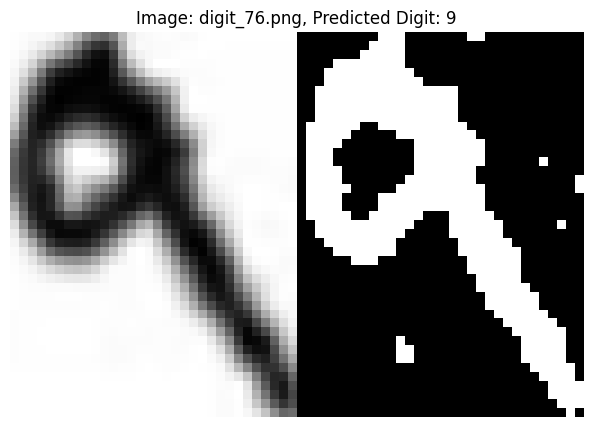

1/1 [==============================] - 0s 18ms/step


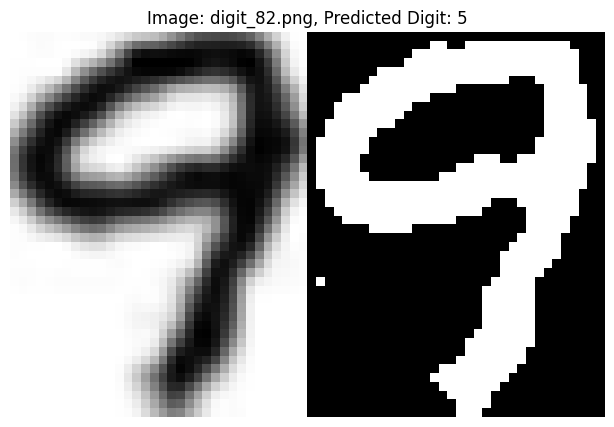

1/1 [==============================] - 0s 19ms/step


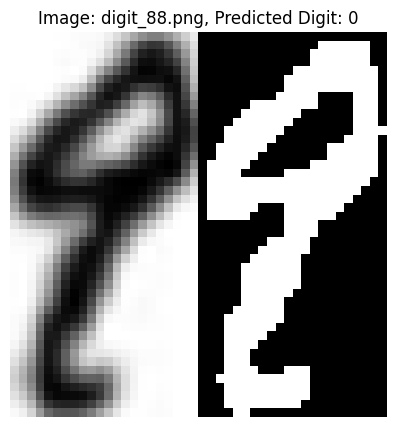

1/1 [==============================] - 0s 19ms/step


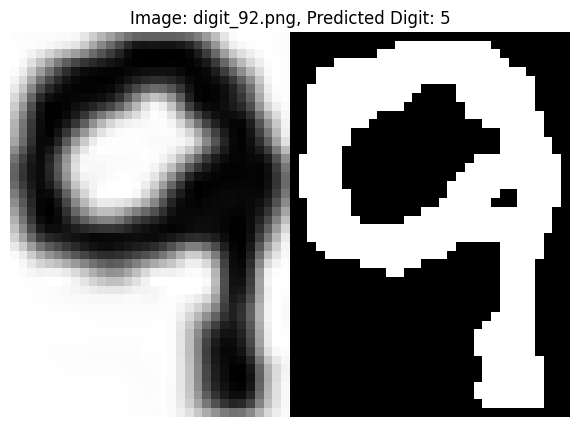

1/1 [==============================] - 0s 22ms/step


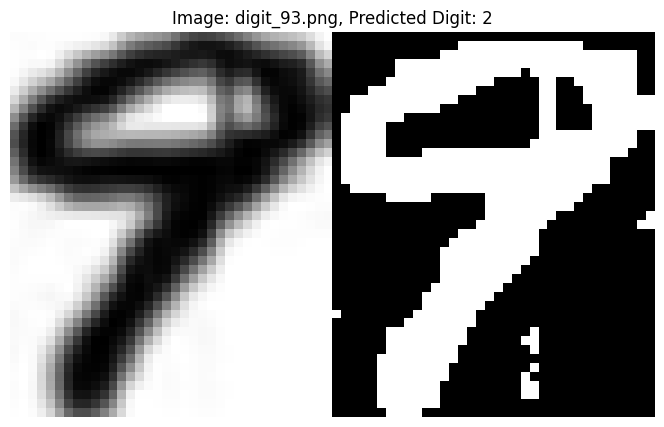

[5, 5, 9, 5, 0, 8, 9, 5, 0, 5, 2]


In [70]:
''' This set of code iterates over every image in the folder, processes the images, predicts the digits in the images using the trained model
and visualizes the images along with the predicted digit.'''
# Creating a list to store the predicted digits for all images. 
digits = []
# The outer loop iterates through all the images in the folder.
for filename in os.listdir(folder_path):
    # Joining the folder path and file mane to create a full image path.
    img_path = os.path.join(folder_path, filename)
    # Reading the image from the path.
    img = cv2.imread(img_path)  
    # Converting the image from the BGR color space to grey scale.
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Applying adaptive thresholding to the grey scale image using Gaussian thresholding with block size of 11 and constant of 2. 
    # This makes the output image binary with he digits as white pixels and the background as black pixels.
    thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)
    # Finding contours in the binary image, retrieving only extreme outer contours and compressing the segments to leave the end points for contour approximation.
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    # Defining a min area for filtering contours.
    min_area = 100
    # Filtering out contours with less area than the min area threshold. 
    contours = [c for c in contours if cv2.contourArea(c) > min_area]
    # Sorting the contours by their x coordinate. 
    contours = sorted(contours, key=lambda c: cv2.boundingRect(c)[0])
    #The nested for loop iterates over each contour found in the thresholded image.
    for contour in contours:
        # Calculating the bounding rectangle of the contour and storing the x,y, width and height in the variables. 
        (x, y, w, h) = cv2.boundingRect(contour)
        # Extracting the digit region from the thresholded image using bounding rectangle coordinates. 
        digit = thresh[y:y+h, x:x+w]
        # Resizing the extracted digit region to 28 x 28 pixles. 
        digit = cv2.resize(digit, (28, 28))
        # Reshaping the digit image to fit the model input shape and normalizing the pixel value range by dividing by 255.0.
        digit = digit.reshape(1, 28, 28, 1)
        digit = digit / 255.0
        # Predicting the digit using hte trained model and gets the digit with the highest probability. 
        prob = model.predict(digit)
        prediction = np.argmax(prob)
        # Appends the predicted digits to the list. 
        digits.append(prediction)

        # Combining the original image and the thresholded image
        combined = cv2.hconcat([img, cv2.cvtColor(thresh, cv2.COLOR_GRAY2BGR)])

        # Showing the combined image and the predicted digit using matplotlib
        plt.figure(figsize=(10, 5))
        plt.imshow(cv2.cvtColor(combined, cv2.COLOR_BGR2RGB))
        plt.title(f'Image: {filename}, Predicted Digit: {prediction}')
        plt.axis('off')
        plt.show()
print(digits)
